# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(50)

#### Import experiment data 

In [3]:
from DATA import NARMA10

data = NARMA10(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [4]:
N_UNITS = 150

In [5]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.9, ro_rescale=0.25, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

## PRETRANING WITH OLD STYLE INTRINSIC PLASTICITY

In [6]:
ip_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.normalMask(N_UNITS), bias = True)

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u

In [7]:
ip_reservoir.pre_train(X_TR, eta=0.000015, epochs=15,  learning_rule="online", verbose=True) #16

- Epoch: 1) | KL Divergence value: 2450.9873046875.
- Epoch: 2) | KL Divergence value: 2391.655029296875.
- Epoch: 3) | KL Divergence value: 2335.12353515625.
- Epoch: 4) | KL Divergence value: 2281.38330078125.
- Epoch: 5) | KL Divergence value: 2230.45263671875.
- Epoch: 6) | KL Divergence value: 2182.33984375.
- Epoch: 7) | KL Divergence value: 2137.01953125.
- Epoch: 8) | KL Divergence value: 2094.42431640625.
- Epoch: 9) | KL Divergence value: 2054.445556640625.
- Epoch: 10) | KL Divergence value: 2016.946044921875.
- Epoch: 11) | KL Divergence value: 1981.779052734375.
- Epoch: 12) | KL Divergence value: 1948.8060302734375.
- Epoch: 13) | KL Divergence value: 1917.909423828125.
- Epoch: 14) | KL Divergence value: 1889.0059814453125.
- Epoch: 15) | KL Divergence value: 1862.041748046875.


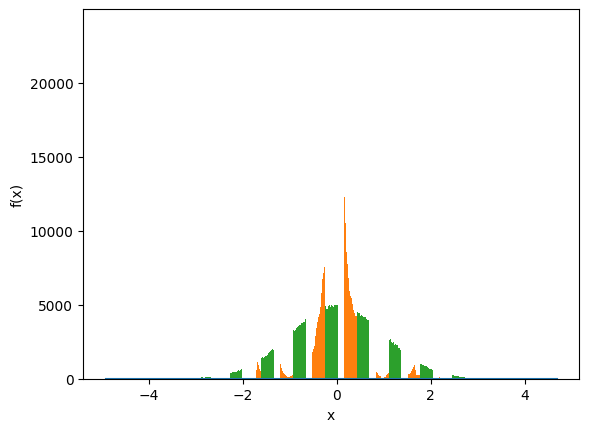

In [8]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [9]:
ip_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-0.07109743356704712)  ACTUAL_STD == (0.0994568020105362)][ TARGET_MEAN == (0.014342498034238815) TARGET_STD == (1.0114353895187378)]
Unit - (2): [ ACTUAL_MEAN == (0.06590818613767624)  ACTUAL_STD == (0.14888952672481537)][ TARGET_MEAN == (0.003262928919866681) TARGET_STD == (1.0150171518325806)]
Overall network: [ACTUAL_MEAN == (0.0062010642141103745)  ACTUAL_STD == (0.4889609217643738)]


## BIMODAL MIXTURE OF GAUSSIAN

In [10]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 

bimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.mixedBimodalMask(N_UNITS), bias = False)

bimodal_reservoir.W_x = W_x
bimodal_reservoir.W_u = W_u
#bimodal_reservoir.b_x = b_x
#bimodal_reservoir.b_u = b_u

In [11]:
bimodal_reservoir.pre_train(X_TR, eta= 0.0000025, epochs=15,  learning_rule="online", verbose=True)

- Epoch: 1) | KL Divergence value: 3458.593017578125.
- Epoch: 2) | KL Divergence value: 3198.53369140625.
- Epoch: 3) | KL Divergence value: 2961.355712890625.
- Epoch: 4) | KL Divergence value: 2748.83935546875.
- Epoch: 5) | KL Divergence value: 2561.64013671875.
- Epoch: 6) | KL Divergence value: 2399.47021484375.
- Epoch: 7) | KL Divergence value: 2261.27587890625.
- Epoch: 8) | KL Divergence value: 2145.533203125.
- Epoch: 9) | KL Divergence value: 2050.41015625.
- Epoch: 10) | KL Divergence value: 1973.994140625.
- Epoch: 11) | KL Divergence value: 1914.422607421875.
- Epoch: 12) | KL Divergence value: 1870.002685546875.
- Epoch: 13) | KL Divergence value: 1839.3402099609375.
- Epoch: 14) | KL Divergence value: 1821.4984130859375.
- Epoch: 15) | KL Divergence value: 1816.1875.


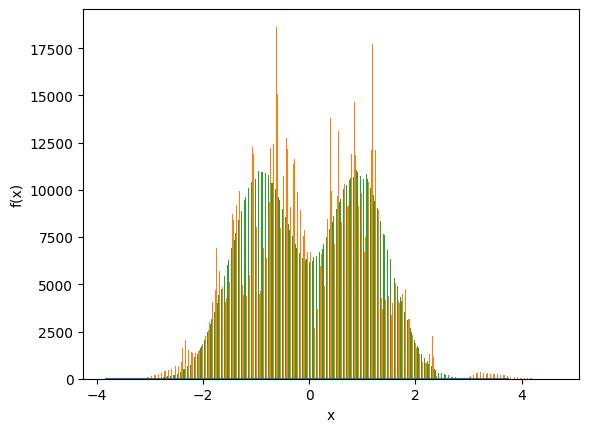

In [12]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [13]:
bimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-1.5985243320465088)  ACTUAL_STD == (0.08789705485105515)][ TARGET_MEAN == (-0.9325616359710693) TARGET_STD == (0.578514039516449)]
Unit - (2): [ ACTUAL_MEAN == (1.328983187675476)  ACTUAL_STD == (0.13433191180229187)][ TARGET_MEAN == (0.9177547097206116) TARGET_STD == (0.5880443453788757)]
Overall network: [ACTUAL_MEAN == (-0.0035334909334778786)  ACTUAL_STD == (1.1293842792510986)]


## EVAUALTUION IN ESN

In [14]:
from ESN import EchoStateNetwork

simple_esn = EchoStateNetwork(simple_reservoir)
ip_esn = EchoStateNetwork(ip_reservoir)
bimodal_esn = EchoStateNetwork(bimodal_reservoir)

simple_esn.reservoir.reset_initial_state()
ip_esn.reservoir.reset_initial_state()
bimodal_esn.reservoir.reset_initial_state()

simple_esn.reservoir.warm_up(X_TR[0:100])
ip_esn.reservoir.warm_up(X_TR[0:100])
bimodal_esn.reservoir.warm_up(X_TR[0:100])

simple_esn.train(X_TR[100:None], Y_TR[100:None], 0)
ip_esn.train(X_TR[100:None], Y_TR[100:None], 0)
bimodal_esn.train(X_TR[100:None], Y_TR[100:None], 0)


Reservoir warmed up with the first 100 time steps


Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


array([0.27734375, 0.23046875, 0.22265625, ..., 0.3046875 , 0.28125   ,
       0.25      ], dtype=float32)

### COMPARISON ON TEST DATA

In [15]:
from Metrics import NRMSE, MSE

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.022829073425682078


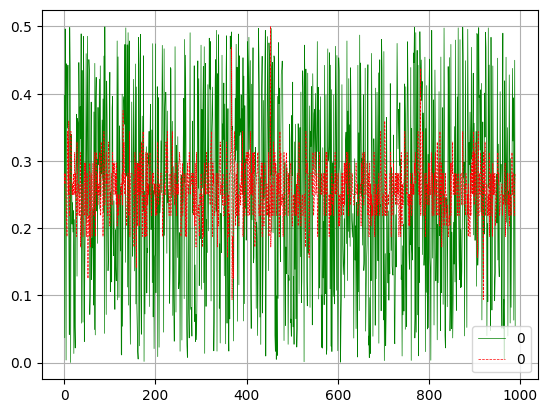

In [16]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02175310693230594


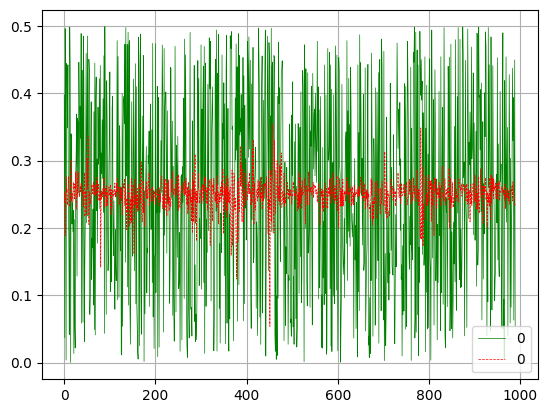

In [17]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.022567508634409983


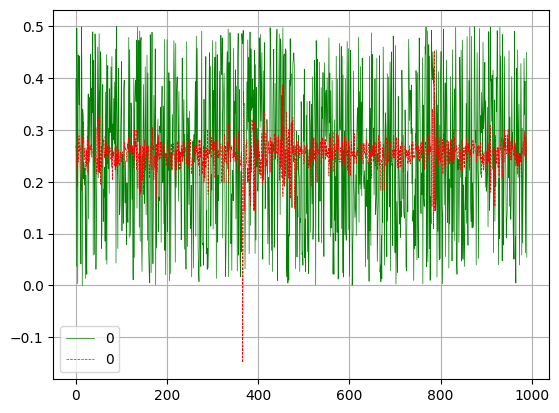

In [18]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

## MEMORY CAPACITY

In [26]:
simple_esn.MemoryCapacity()

tensor(6.8709)

In [25]:
ip_esn.MemoryCapacity()

tensor(11.8505)

In [24]:
bimodal_esn.MemoryCapacity()

tensor(11.3439)

## LYAPUNOV EXPONENTS

In [31]:
simple_esn.reservoir.LCE(X_TS)

-1.4158043

In [30]:
ip_esn.reservoir.LCE(X_TS)

-0.71591413

In [32]:
bimodal_esn.reservoir.LCE(X_TS)

-2.805847

## $\delta_{\phi}$

In [27]:
simple_esn.reservoir.de_fi()

0.24597727976837533


In [28]:
ip_esn.reservoir.de_fi()

0.25134185363211814


In [29]:
bimodal_esn.reservoir.de_fi()

0.2572850639835221


## MEMORY CAPACITY

In [33]:
def mean_mc(esn: EchoStateNetwork, rep):
    mc = 0
    for _ in range(rep):
        mc += esn.MemoryCapacity()

    return mc/rep

In [34]:
mean_mc(simple_esn, 5)

tensor(6.8896)

In [35]:
mean_mc(ip_esn, 5)

tensor(11.7303)

In [36]:
mean_mc(bimodal_esn, 5)

tensor(11.3536)

## DEVIATION FROM LINEARITY

In [37]:
simple_esn.reservoir.de_fi()

0.2459752344818082


In [38]:
ip_esn.reservoir.de_fi()

0.25134576336507436


In [39]:
bimodal_esn.reservoir.de_fi()

0.25728510998769777
